<a href="https://colab.research.google.com/github/RFJC21/keras_basics/blob/master/Keras_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error,mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [32]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fake_reg.csv']))
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


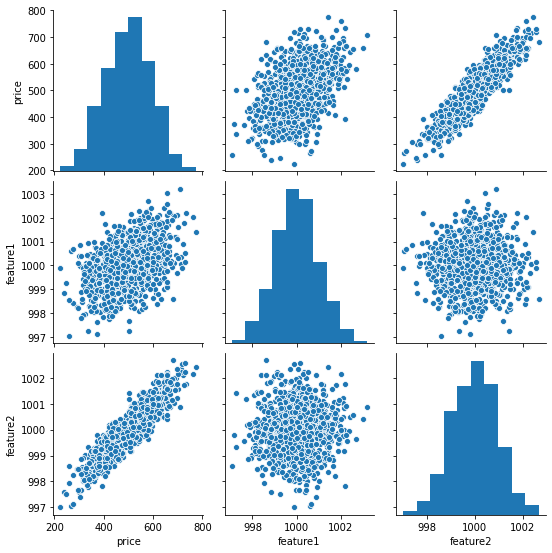

In [4]:
sns.pairplot(df)

# Split Data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# always as a nunpy array
# features
X=df[['feature1','feature2']].values

In [0]:
# label
y=df['price'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Normalize or sacale our data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# just features and just fit on train set

In [0]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Create Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
#help(Sequential)

In [0]:
#This project is a Regression Problem!! Predictiong a price
#out put is 1, because we are going to compare the predicted price to our true price
model=Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

#Fit Model to Trainning Data

In [48]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256999.3438
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256781.1875
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256554.2500
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256593.1875
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256680.4375
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256670.7656
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256537.3438
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256493.0938
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256408.0938
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256496.0000
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 256518.6562
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

# Plot Loss

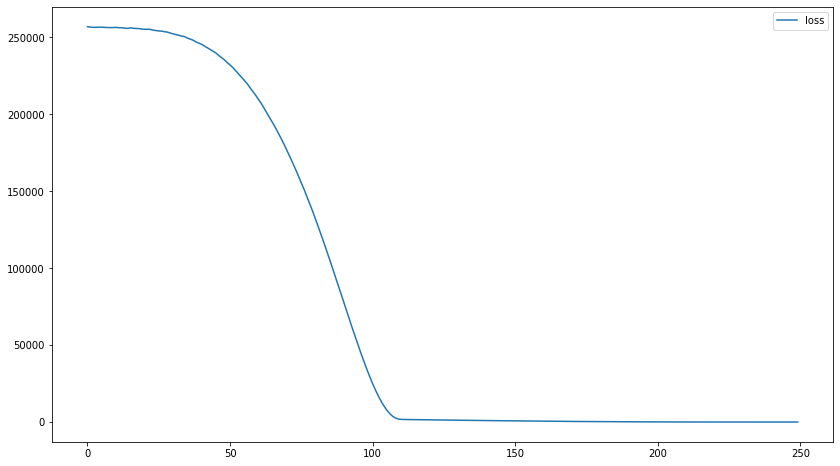

In [49]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

# Evaluate Model on test set

In [50]:
model.evaluate(X_test,y=y_test,verbose=0)

25.680980682373047

In [51]:
#evaliate on train set
model.evaluate(X_train,y=y_train)

22/22 [==============================] - 0s 960us/step - loss: 23.8316


23.831634521484375

# Predictions

In [0]:
test_predictions=model.predict(X_test)

In [0]:
#to series
test_predictions=pd.Series(test_predictions.reshape(300,))

In [0]:
test_predictions

In [0]:
#create dataframe with real and preducted test values
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [0]:
pred_df

In [0]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [68]:
pred_df.columns=(['Test True Y','Model Predictions'])
pred_df

,Test True Y,Model Predictions
0,402.296319,405.752106
1,624.156198,623.711365
2,582.455066,592.276794
3,578.588606,572.622864
4,371.224104,367.429901
...,...,...
295,525.704657,529.476257
296,502.909473,516.136230
297,612.727910,609.807983
298,417.569725,417.261139


# Plot Predictions

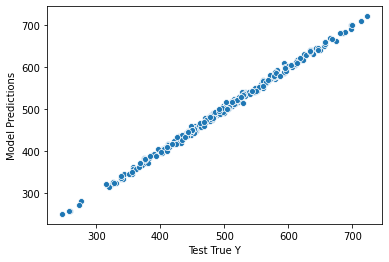

In [72]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

# Regression Evaluation

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
# em media estamos este valor fora
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.041676961144407

In [75]:
df.mean()

price        498.673029
feature1    1000.014171
feature2     999.979847
dtype: float64

In [77]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

5.022763344905881

In [78]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

5.022763344905881

# Prediction on New Data

In [79]:
new_gem=[[998,1000]]
new_gem=scaler.transform(new_gem)
model.predict(new_gem)

array([[420.40817]], dtype=float32)

# Save Model

In [80]:
from tensorflow.keras.models import load_model
model.save('test_model.h5')
later_model=load_model('test_model.h5')
later_model.predict(new_gem)

array([[420.40817]], dtype=float32)